
## Problem 1: Optical Flow 
<font color = "blue">_Sudarsanan A K <BR>
SC21M063_ </font> 

**In this problem, the single scale Lucas-Kanade method for estimating optical flow will be implemented, and the data needed for this problem can be found in the folder 'optical_flow_images'.
An example optical flow output is shown below - this is not a solution, just an example output.**


### Part 1: Lucas-Kanade implementation 

Implement the Lucas-Kanade method for estimating optical flow. The function 'LucasKanade' needs to be completed.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2

def grayscale(img):
    gray=np.zeros((img.shape[0],img.shape[1]))
    gray=img[:,:,0]*0.2989+img[:,:,1]*0.5870+img[:,:,2]*0.1140
    return gray

def plot_optical_flow(img,U,V):
    # Change t if required, affects the number of arrows
    # t should be between 1 and min(U.shape[0],U.shape[1])
    t=10 
    
    # Subsample U and V to get visually pleasing output
    U1 = U[::t,::t]
    V1 = V[::t,::t]
    
    # Create meshgrid of subsampled coordinates
    r, c = img.shape[0],img.shape[1]
    cols,rows = np.meshgrid(np.linspace(0,c-1,c), np.linspace(0,r-1,r))
    cols = cols[::t,::t]
    rows = rows[::t,::t]
    
    # Plot optical flow
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.quiver(cols,rows,U1,V1)
    plt.show()

images=[]
for i in range(1,5):
    images.append(plt.imread('opticalflow_data/im'+str(i)+'.png'))

In [3]:
def LucasKanade(im1,im2,window):
    U = np.zeros(im1.shape)
    V = np.zeros(im1.shape)
    
    dy,dx = np.gradient(im1)
    dt = im2-im1
    
    X2 = conv2(dx*dx, np.ones((window,window)),boundary='symm', mode='same')
    Y2 = conv2(dy*dy, np.ones((window,window)),boundary='symm', mode='same')
    XY = conv2(dx*dy, np.ones((window,window)),boundary='symm', mode='same')
    XT = conv2(dx*dt, np.ones((window,window)),boundary='symm', mode='same')
    YT = conv2(dy*dt, np.ones((window,window)),boundary='symm', mode='same')
    edge = (window-1)/2
    for i in range(int(edge),int(im1.shape[0]-edge-1)):
        for j in range(int(edge),int(im1.shape[1]-edge-1)):
            A = np.array([[X2[i,j],XY[i,j]],[ XY[i,j],Y2[i,j]]])/(window*window)
            B = np.array([[-1*XT[i,j]],[-1*YT[i,j]]])/(window*window)
            x = np.dot(np.linalg.pinv(A),B)
            U[i,j] = x[0]
            V[i,j] = x[1]
    

    
    return U,V

### Part-2:Window size

**Plot optical flow for the pair of images im1 and im2 for at least 3 different window sizes which leads to observable difference in the results. Comment on the effect of window size on results and justify.**

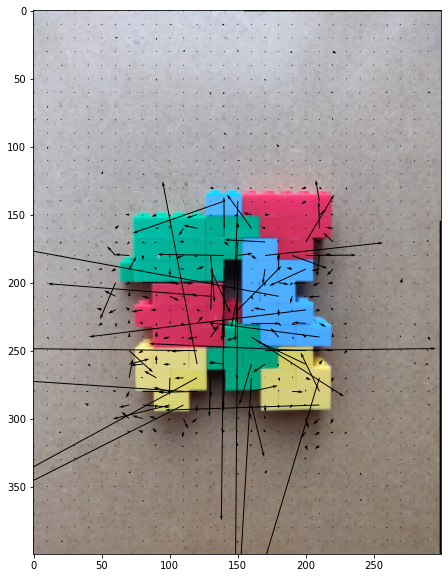

In [4]:
# Example code, change as required
window=5
U,V=LucasKanade(grayscale(images[0]),grayscale(images[1]),window)
plot_optical_flow(images[0],U,V)

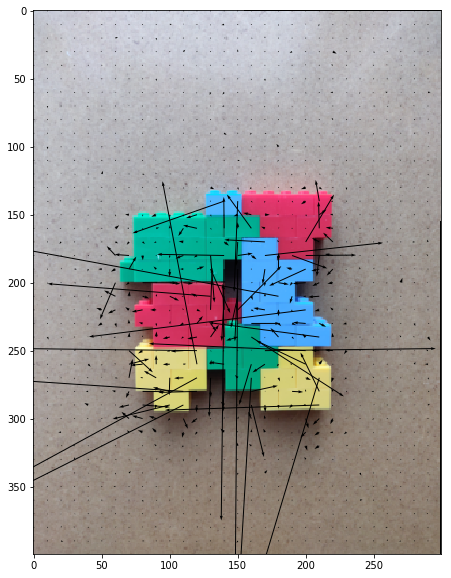

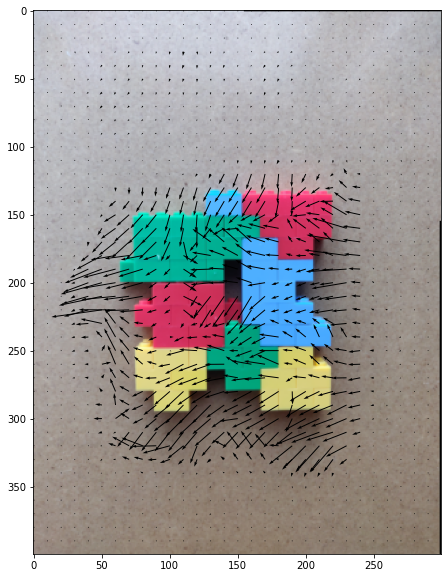

In [5]:
# Example code, change as required
window=45
U,V=LucasKanade(grayscale(images[0]),grayscale(images[1]),window)
plot_optical_flow(images[0],U,V)

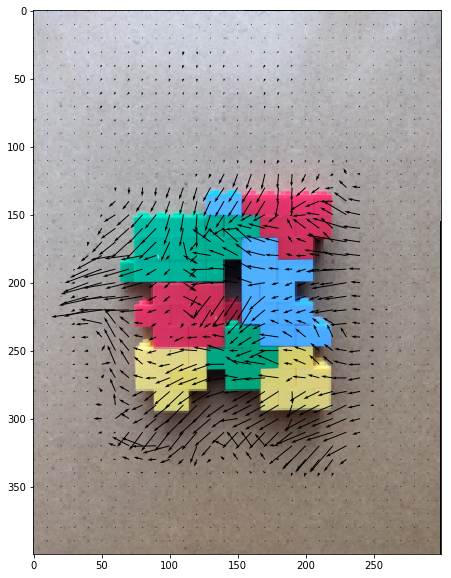

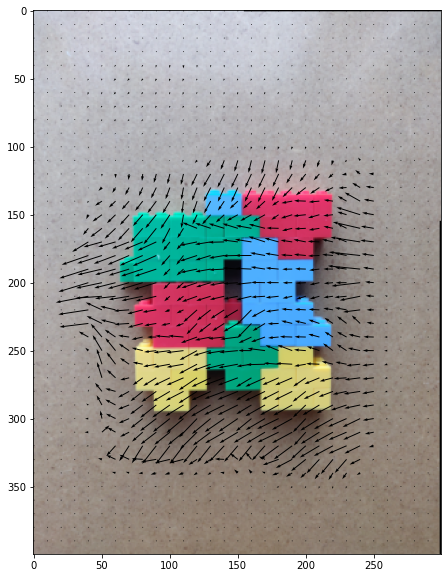

In [6]:
# Example code, change as required
window=65
U,V=LucasKanade(grayscale(images[0]),grayscale(images[1]),window)
plot_optical_flow(images[0],U,V)

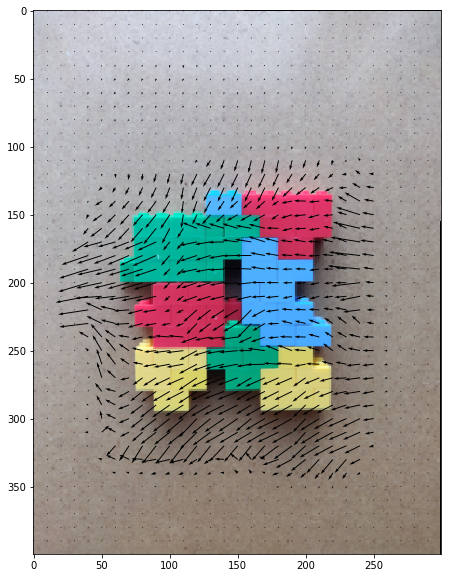

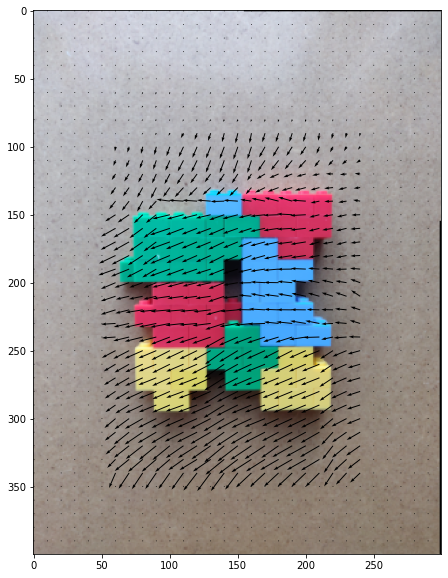

In [7]:
# Example code, change as required
window=105
U,V=LucasKanade(grayscale(images[0]),grayscale(images[1]),window)
plot_optical_flow(images[0],U,V)

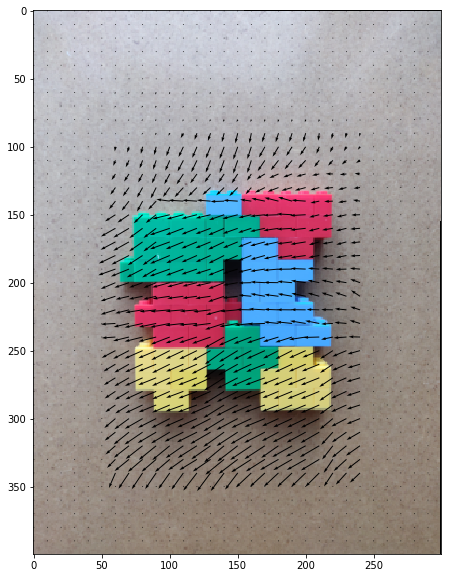

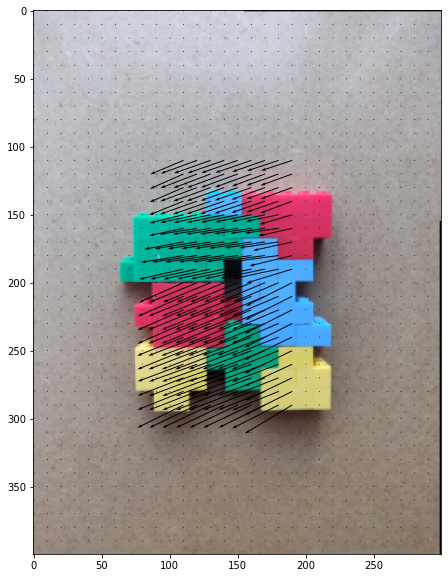

In [8]:
window=205
U,V=LucasKanade(grayscale(images[0]),grayscale(images[1]),window)
plot_optical_flow(images[0],U,V)

Comment:
When the window size is small, the arrows are messy (even two close arrows are pointing to different directions). That might because the window size is too small to capture the movement of the object. As the window size increased, the arrows become uniform within a certain area and we can start to see the trend of the movement. When the window size is large (larger than 105), all the arrows is going to point to the same direction. That might because the window size is too large so it only captures the most obvious movement of the object.

### Part 3: All pairs 
Find optical flow for the pairs (im1,im2), (im1,im3), (im1,im4) using a good window size. Does the optical flow result seem consistent with visual inspection? Comment on the type of motion indicated by results and visual inspection and explain why they might be consistent or inconsistent.

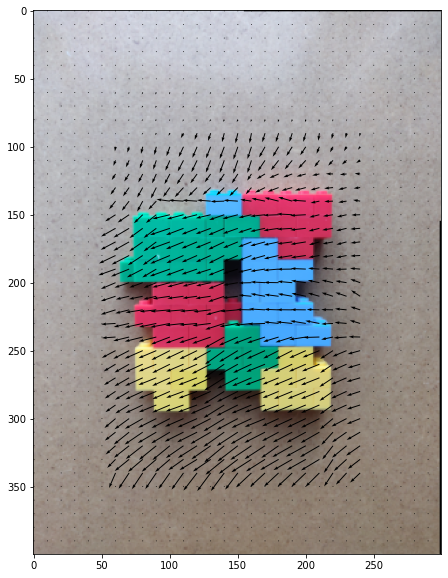

In [9]:
window=105
U,V=LucasKanade(grayscale(images[0]),grayscale(images[1]),window)
plot_optical_flow(images[0],U,V)

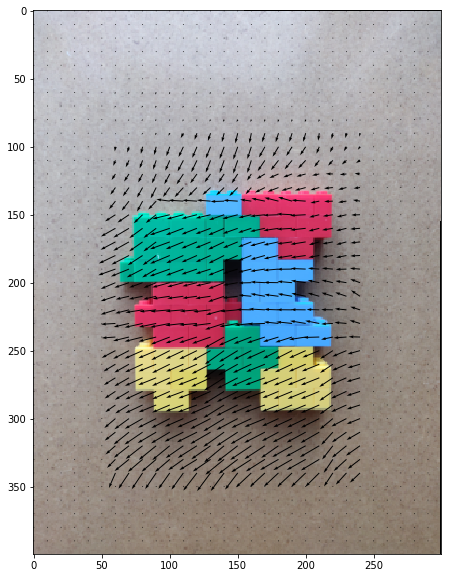

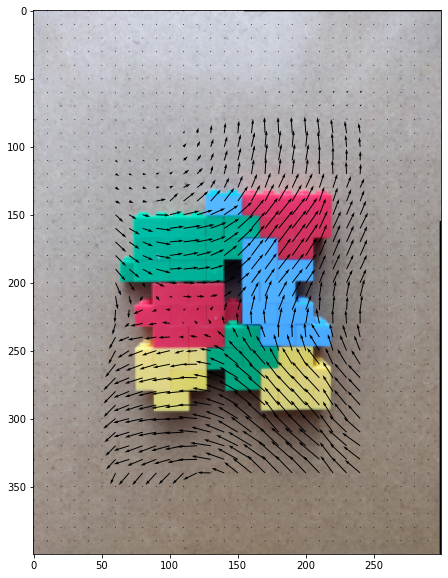

In [10]:
window=105
U,V=LucasKanade(grayscale(images[0]),grayscale(images[2]),window)
plot_optical_flow(images[0],U,V)

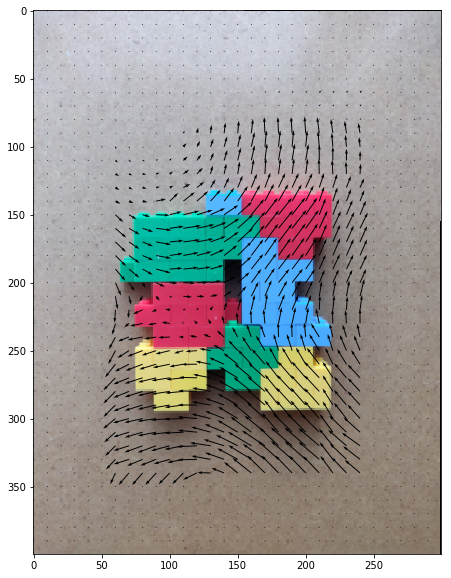

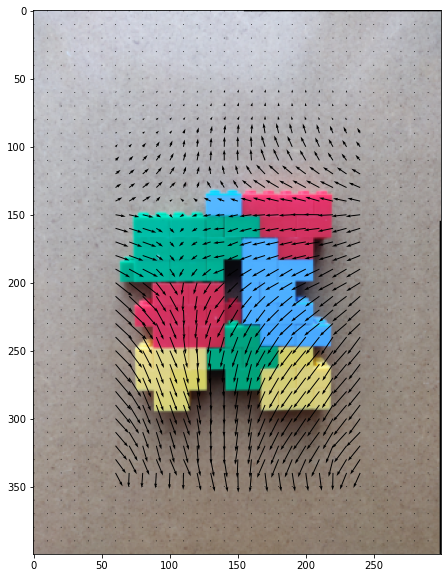

In [11]:
window=105
U,V=LucasKanade(grayscale(images[0]),grayscale(images[3]),window)
plot_optical_flow(images[0],U,V)

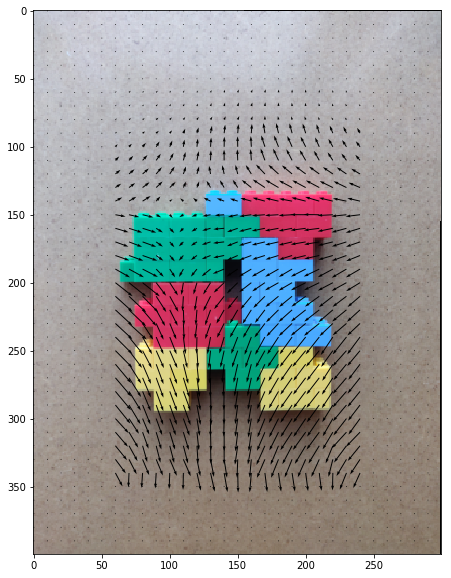

Comment:
For pair(im1,im2), by visual inspection, the object is moving to the right. Most of the resulting arrows are pointing to the right which is consistent with my visual inspection.
For pair(im1,im3), by visual inspection, the object is rotating in clockwise. However, the resutling arrows are not showing the rotation. The result is inconsistent. That might because the lighting condition is different, which affects the optical flow estimation.
For pair(im1,im4), by visual inspection, the object is zooming out. The horizontal resulting arrows are consistent but the vertical arrows are inconsistent. One reason might be we are summing up the gradient of a certain window, so we can only have one direction for optical flow for a certain window area. However, for the zoom out case, especially on the center of the object, all the arrows should point to the center point (different directions). Therefore, LucasKanade algorithm can not deal with this case.